### DEMQUA03
# Area under 1-D and 2-D curves, various methods

Uni- and bi-vaiariate integration using Newton-Cotes, Gaussian, Monte Carlo, and quasi-Monte Carlo quadrature methods.

In [1]:
import numpy as np
from compecon import qnwtrap, qnwsimp, qnwlege, demo
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
quadmethods = [qnwtrap, qnwsimp, qnwlege]

### Make support function

In [3]:
a, b = -1, 1
nlist = [5, 11, 21, 31]
N = len(nlist)

def quad(func, qnw, n):
    xi, wi = qnw(n,a,b)
    return np.dot(func(xi),wi)

## Evaluating $\int_{-1}^1e^{-x}dx$

In [4]:
def f(x):
    return np.exp(-x)

f_quad = np.array([[quad(f, qnw, ni) for qnw in quadmethods] for ni in nlist])
f_true = np.exp(1) - 1/np.exp(1)
f_error = np.log10(np.abs(f_quad/f_true - 1))


## Evaluating $\int_{-1}^1\sqrt{|x|}dx$

In [5]:
def g(x):
    return np.sqrt(np.abs(x))

g_quad = np.array([[quad(g, qnw, ni) for qnw in quadmethods] for ni in nlist])
g_true = 4/3
g_error = np.log10(np.abs(g_quad/g_true - 1))

## Make table with results

In [6]:
results = pd.DataFrame(np.r_[f_error,g_error])

results.columns=['Trapezoid rule', "Simpson's rule", 'Gauss-Legendre']
results['Integral'] = [r'$\int_{-1}^1e^{-x}dx$']*N + [r'$\int_{-1}^1\sqrt{|x|}dx$']*N
results['Nodes n'] = nlist*2
results.set_index(['Integral', 'Nodes n'], inplace=True)
results

Trapezoid rule  Simpson's rule  \
Integral                  Nodes n                                   
$\int_{-1}^1e^{-x}dx$     5             -1.683044       -3.472173   
                          11            -2.477411       -5.053217   
                          21            -3.079254       -6.255789   
                          31            -3.431396       -6.959867   
$\int_{-1}^1\sqrt{|x|}dx$ 5             -1.023788       -1.367611   
                          11            -1.595301       -1.347900   
                          21            -2.034517       -2.414470   
                          31            -2.293296       -2.063539   

                                   Gauss-Legendre  
Integral                  Nodes n                  
$\int_{-1}^1e^{-x}dx$     5             -9.454795  
                          11           -14.273349  
                          21           -14.653560  
                          31                 -inf  
$\int_{-1}^1\sqrt{|x|}dx$ 5             -0.870112  
                          11            -1.351241  
                          21            -1.758970  
                          31            -2.007803

## Plot the functions

([<matplotlib.axis.YTick at 0x26272daec88>],
 <a list of 1 Text yticklabel objects>)

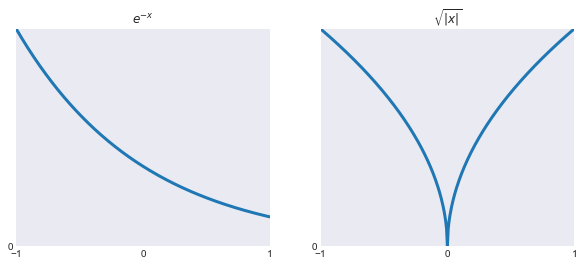

In [7]:
a, b, n = -1, 1, 301
x = np.linspace(a, b, n)

plt.figure(figsize=[10,4])
demo.subplot(1, 2, 1, '$e^{-x}$','','',[a,b],[0,f(a)])
plt.plot(x, f(x), linewidth=3)
plt.xticks([-1,0,1])
plt.yticks([0])

demo.subplot(1, 2, 2, '$\sqrt{|x|}$','','',[a,b],[0,g(a)])
plt.plot(x, g(x), linewidth=3)
plt.xticks([-1,0,1])
plt.yticks([0])


In [8]:
#results.to_latex('figures/demqua03.tex', escape=False, float_format='%.1f')
#demo.savefig([plt.gcf()])